In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
### Importing dataset
data = pd.read_csv('https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv')

In [3]:
data.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority,NaN


###### In this dataset we have 2 target variables one is Capacity_mw (continous datatype) and primaryfuel(Catogorical datatype)

### Exploratory Data Analysis (EDA)

In [4]:
### checking size of our dataset.
data.shape

(908, 25)

###### We have 908 rows and 25 columns.

In [5]:
### Checking basic information about our dataset.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   908 non-null    object 
 1   country_long              908 non-null    object 
 2   name                      908 non-null    object 
 3   gppd_idnr                 908 non-null    object 
 4   capacity_mw               908 non-null    float64
 5   latitude                  862 non-null    float64
 6   longitude                 862 non-null    float64
 7   primary_fuel              908 non-null    object 
 8   other_fuel1               199 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        528 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    908 non-null    object 
 14  url       

###### There are missing data in multiple columns. 
###### Also by looking data we found that Owner and source column contain same data.

In [6]:
data.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

###### By looking at Null values count, We found that others fuel columns has more then 700 null values so its better we can drop this columns.
###### Also Wepp_id, Estimated_generation_gwh have 908 null values which means this columns does not contain any information. we can drop them too.
Also We can see year_of_capacity_data, commissioning_year columns contain years data with null values.
Country and Country_long is just showing same data. We can remove anyone. 
Also source and generation_data_source columns showing same data, Hence we could remove generation_data_source column as it contain  458 missing data.

In [7]:
data.drop(columns=['wepp_id','estimated_generation_gwh','other_fuel1','other_fuel2','other_fuel3','owner','url','generation_data_source','year_of_capacity_data','country'],axis=1,inplace=True)

In [8]:
data.head()

,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN
1,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,WRI,NaN,NaN,NaN,NaN,NaN
2,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN
3,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,2004.0,Central Electricity Authority,WRI,631.777928,617.789264,843.747,886.004428,663.774500
4,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,2015.0,Central Electricity Authority,WRI,1668.290000,3035.550000,5916.370,6243.000000,5385.579736


In [9]:
data.isnull().sum()

country_long             0
name                     0
gppd_idnr                0
capacity_mw              0
latitude                46
longitude               46
primary_fuel             0
commissioning_year     380
source                   0
geolocation_source      19
generation_gwh_2013    524
generation_gwh_2014    507
generation_gwh_2015    483
generation_gwh_2016    471
generation_gwh_2017    465
dtype: int64

In [10]:
### Filling NaN for generation_gwh_2013 Column grouping by fuel type.
data['generation_gwh_2013'].fillna(data.groupby('primary_fuel')['generation_gwh_2013'].transform('mean'), inplace=True)
data['generation_gwh_2013'].fillna(data['generation_gwh_2013'].mean(),inplace=True)
data['generation_gwh_2014'].fillna(data['generation_gwh_2014'].mean(),inplace=True)
data['generation_gwh_2015'].fillna(data['generation_gwh_2015'].mean(),inplace=True)
data['generation_gwh_2016'].fillna(data['generation_gwh_2016'].mean(),inplace=True)
data['generation_gwh_2017'].fillna(data['generation_gwh_2017'].mean(),inplace=True)


In [11]:
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
SI = SimpleImputer(strategy='most_frequent')

In [12]:
df = SI.fit_transform(data[['geolocation_source']]) 
data['geolocation_source'] = df

In [13]:
data['commissioning_year'] = SI.fit_transform(data[['commissioning_year']])

In [14]:
knn_imputer = KNNImputer(n_neighbors=3)
data['longitude'] = knn_imputer.fit_transform(data[['latitude','longitude']])

In [15]:
data['latitude'] = knn_imputer.fit_transform(data[['longitude','latitude']])

In [16]:
data.tail(10)

,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
898,India,Wind power project by Riddhi Siddhi Gluco Biol...,WRI1026753,34.65,8.8709,8.8709,Wind,2013.0,CDM,WRI,2427.983995,2420.393316,2414.072373,2453.936292,2531.754458
899,India,Wind power project in Rajasthan,WRI1026769,42.00,27.1715,27.1715,Wind,2013.0,CDM,WRI,2427.983995,2420.393316,2414.072373,2453.936292,2531.754458
900,India,YAMUNANAGAR TPP,IND0000511,600.00,30.1081,30.1081,Coal,2007.0,Central Electricity Authority,WRI,3158.016000,3194.359820,3709.552200,3123.572061,3156.053669
901,India,YASHWANTRAO MOHITE,WRI1019995,16.00,17.1653,17.1653,Biomass,2013.0,Yashwantrao Krishna ssk,WRI,2427.983995,2420.393316,2414.072373,2453.936292,2531.754458
902,India,YELHANKA (DG),IND0000512,106.60,13.1156,13.1156,Oil,1993.0,Central Electricity Authority,WRI,20.900000,0.000000,0.000000,0.000000,2531.754458
903,India,YERMARUS TPP,IND0000513,1600.00,16.2949,16.2949,Coal,2016.0,Central Electricity Authority,WRI,4493.453506,2420.393316,0.994875,233.596650,865.400000
904,India,Yelesandra Solar Power Plant,WRI1026222,3.00,12.8932,12.8932,Solar,2013.0,Karnataka Power Corporation Limited,Industry About,2427.983995,2420.393316,2414.072373,2453.936292,2531.754458
905,India,Yelisirur wind power project,WRI1026776,25.50,15.2758,15.2758,Wind,2013.0,CDM,WRI,2427.983995,2420.393316,2414.072373,2453.936292,2531.754458
906,India,ZAWAR MINES,WRI1019901,80.00,24.3500,24.3500,Coal,2013.0,Hindustan Zinc ltd,WRI,4493.453506,2420.393316,2414.072373,2453.936292,2531.754458
907,India,iEnergy Theni Wind Farm,WRI1026761,16.50,9.9344,9.9344,Wind,2013.0,CDM,WRI,2427.983995,2420.393316,2414.072373,2453.936292,2531.754458


In [17]:
data.isnull().sum()

country_long           0
name                   0
gppd_idnr              0
capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
commissioning_year     0
source                 0
geolocation_source     0
generation_gwh_2013    0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
dtype: int64

Great all the null values are taken care now. we are good to move on.

In [18]:
### Checking data information statistically.
data.describe()

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
count,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000
mean,321.046378,21.196189,21.196189,2003.624449,2427.983995,2420.393316,2414.072373,2453.936292,2531.754458
std,580.221767,6.088110,6.088110,15.238021,2639.222656,2665.360236,2860.146282,2878.730064,2923.041411
min,0.000000,8.168900,8.168900,1927.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.837500,17.057825,17.057825,1997.000000,821.529637,1175.264825,874.205000,826.629750,852.438887
50%,60.000000,21.278850,21.278850,2013.000000,2427.983995,2420.393316,2414.072373,2453.936292,2531.754458
75%,388.125000,25.183775,25.183775,2013.000000,2427.983995,2420.393316,2414.072373,2453.936292,2531.754458
max,4760.000000,34.649000,34.649000,2018.000000,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000


Looks like data distribution is fine for all the columns but we will check.
The Count is same for all the columns.
Also the difference between mean and std in Capacity mw is high which means that data distribution is not equal Will look into it. Reset all the columnes mean and std differnce is ok.
The difference between min . Max and all 3 Quartiles are seems like ok.

## Let's start univarite Anaylsis.
#### (i) Univariate analysis

In [19]:
data.columns

Index(['country_long', 'name', 'gppd_idnr', 'capacity_mw', 'latitude',
       'longitude', 'primary_fuel', 'commissioning_year', 'source',
       'geolocation_source', 'generation_gwh_2013', 'generation_gwh_2014',
       'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017'],
      dtype='object')

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

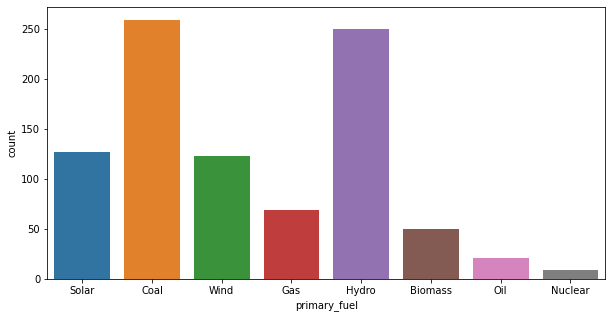

In [20]:
### checking types of fuel we have
plt.figure(figsize=(10,5))
sns.countplot(x= 'primary_fuel',data=data)

As we can see From above bar chart the primary_fuel for max plant are  Coal and Hydro. And very less plants uses nuclear energy to produce electricity.

In [21]:
cols = data[['capacity_mw', 'latitude',
       'longitude','commissioning_year', 'generation_gwh_2013', 'generation_gwh_2014',
        'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017']]

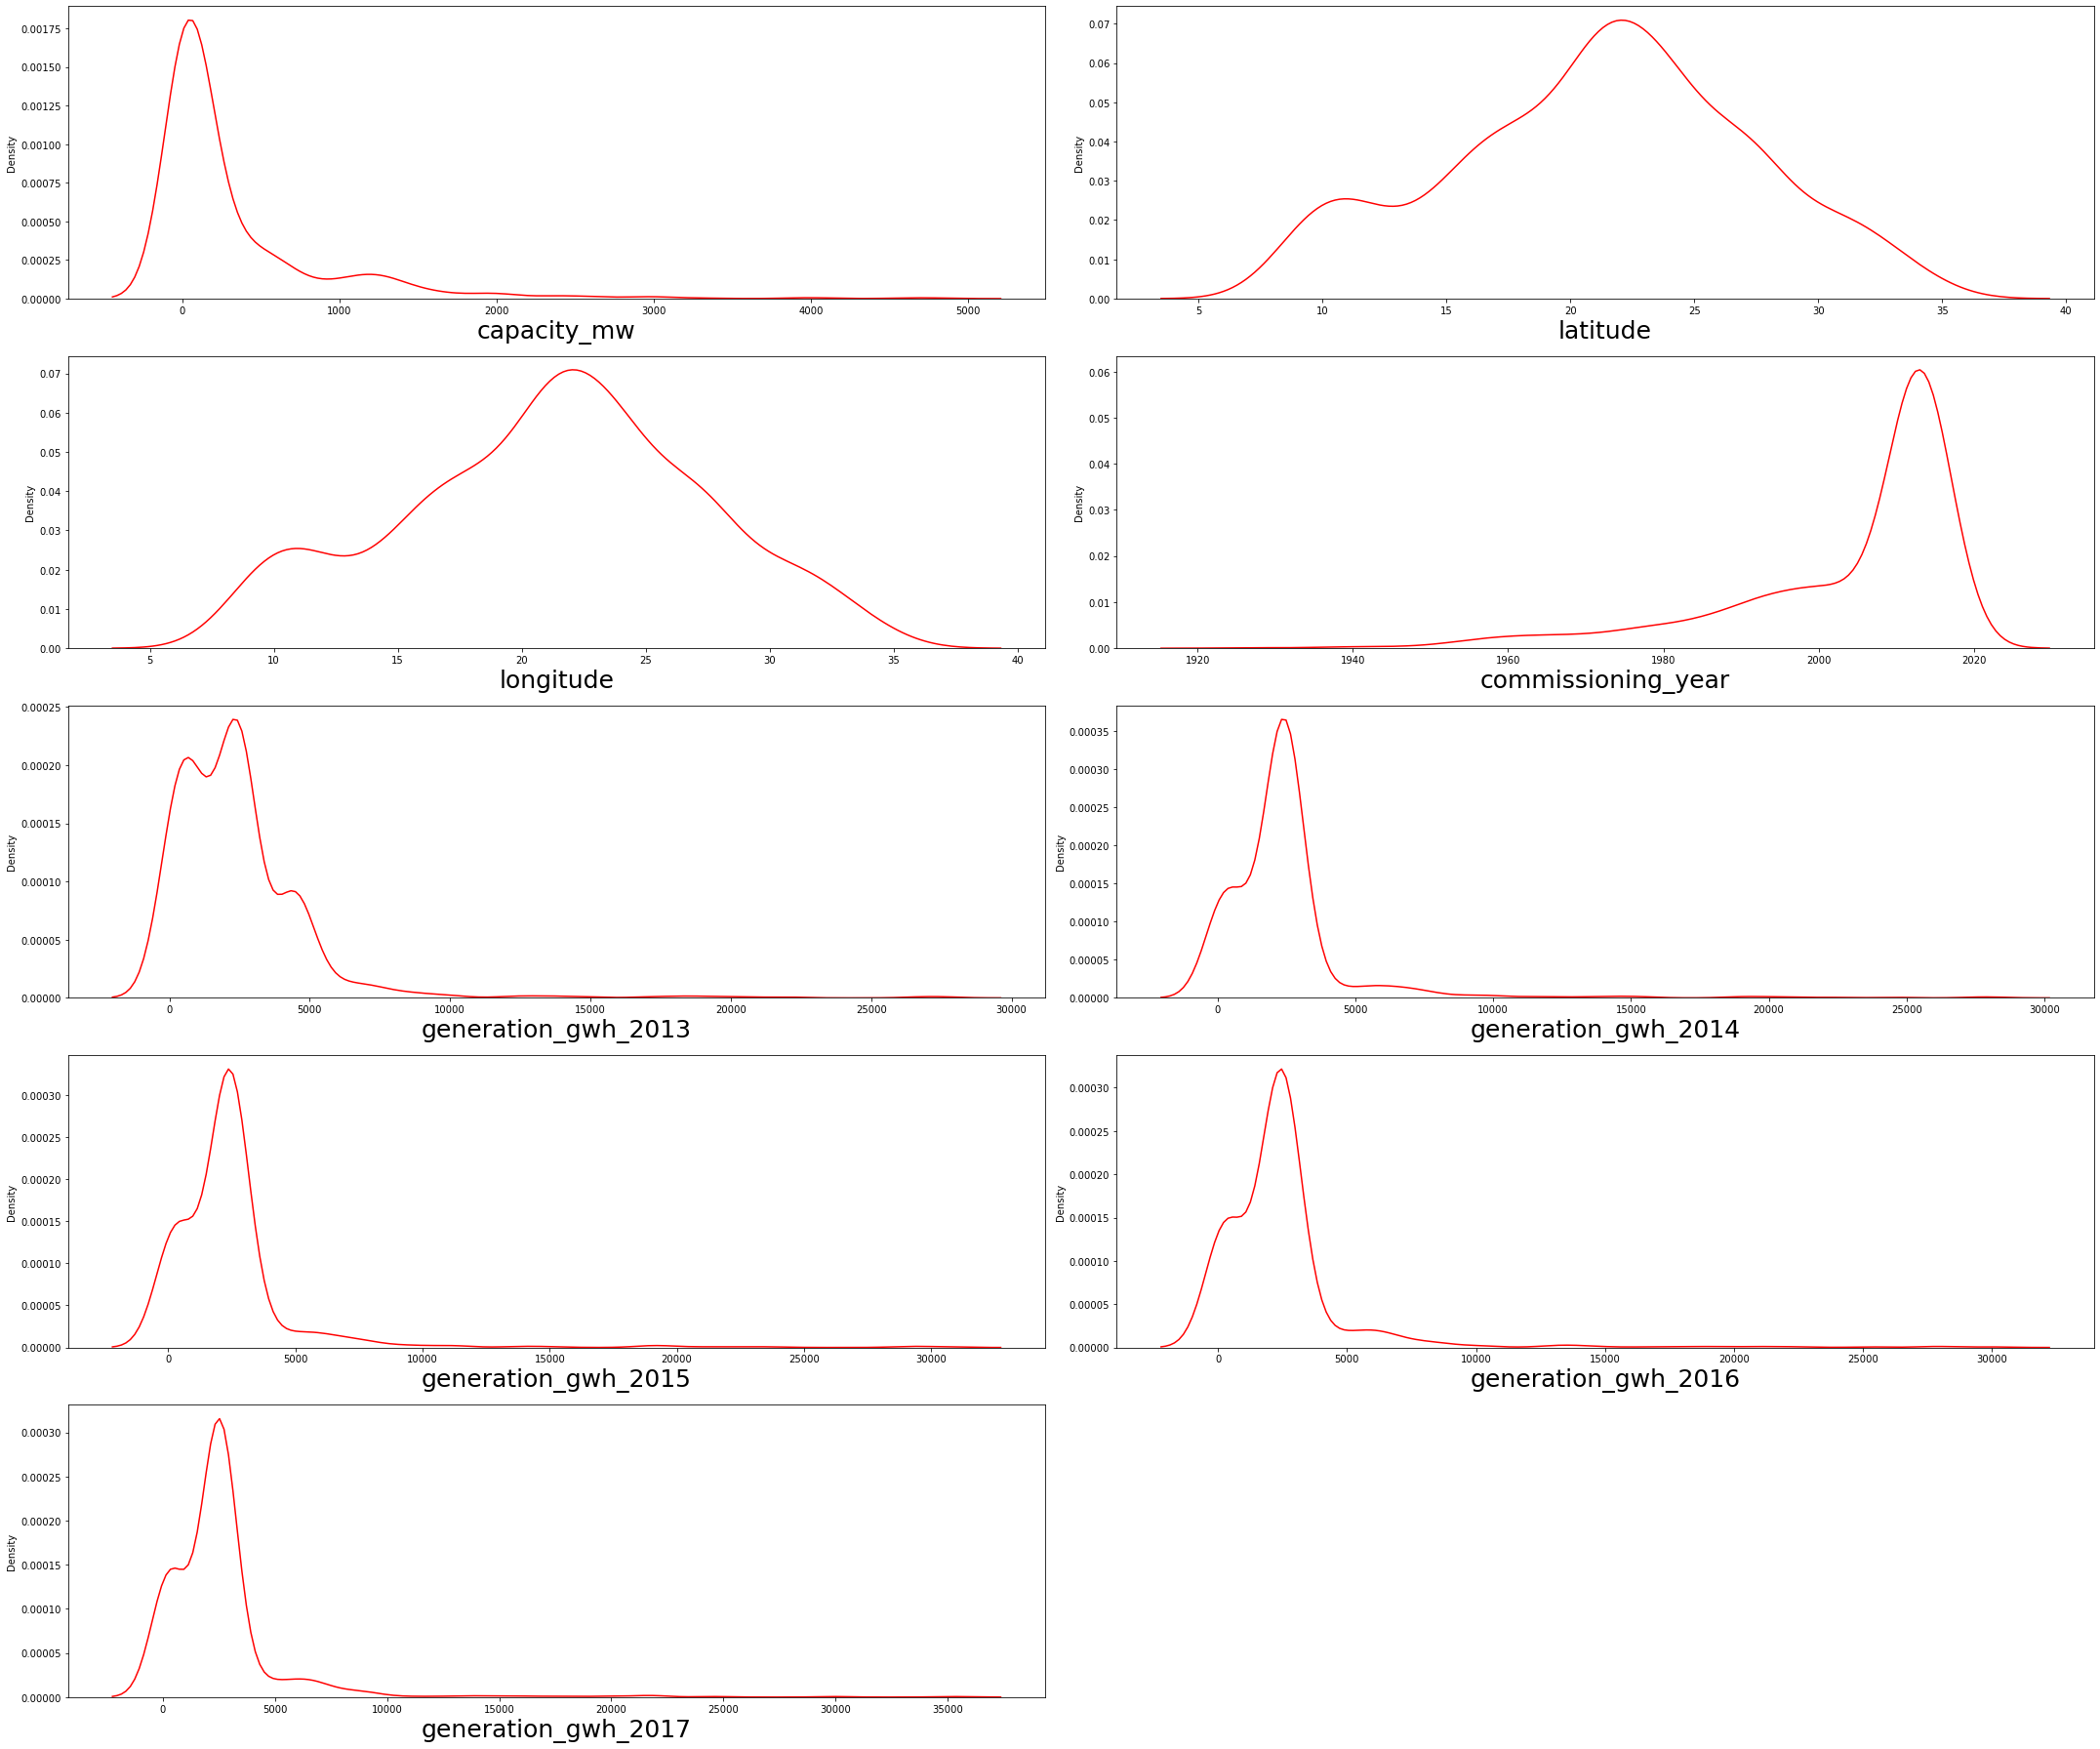

In [22]:
### Let's check data destribution first.
plt.figure(figsize=(30,25), facecolor='white')
plotnumber = 1

for column in cols:
    if plotnumber <= 10:
        ax = plt.subplot(5,2,plotnumber)
        sns.kdeplot(data[column],color='r')
        plt.xlabel(column,fontsize=25)
        
    plotnumber+=1
plt.tight_layout()

From above Distribution plot we can see that our data for generation gwh columns contain skewed data.
Only latitude & longitude columns contain normal distribution.

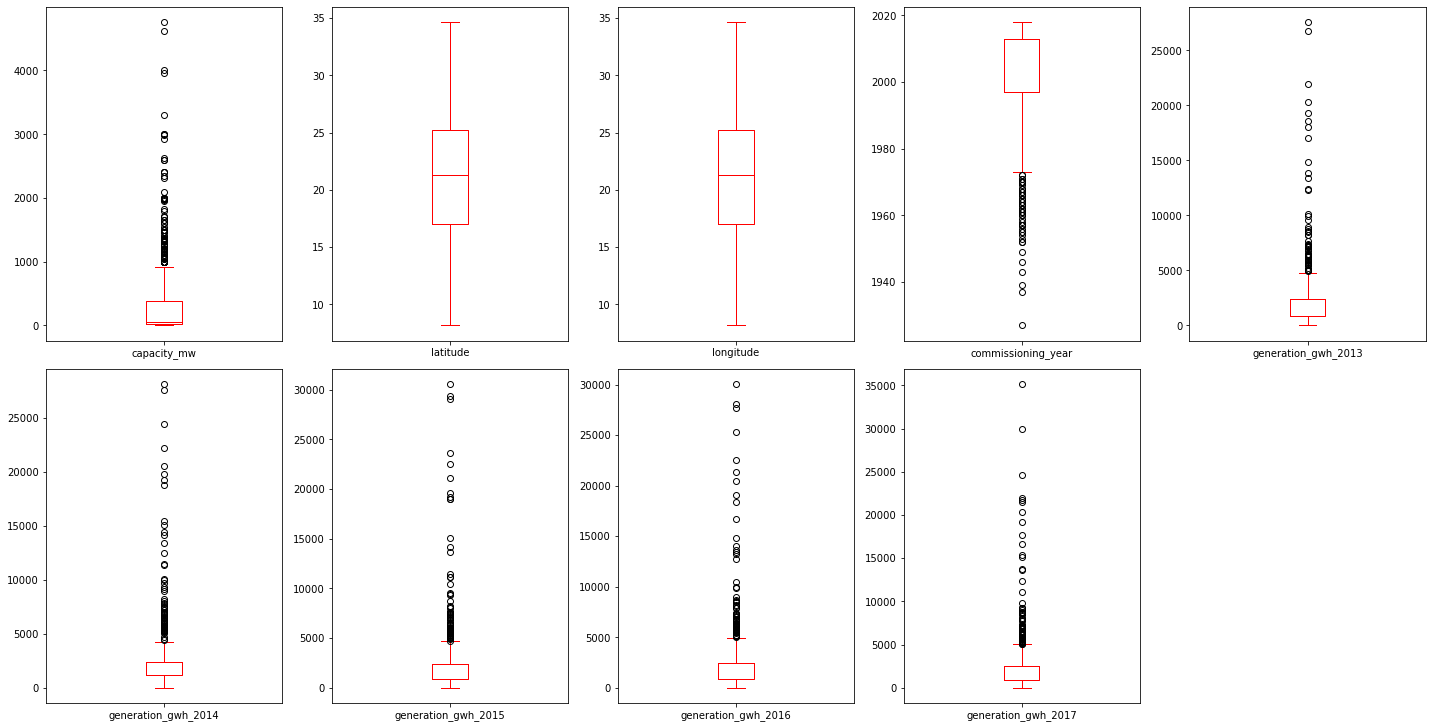

In [23]:
### Ploting box plot to check for outliers.
plt.figure(figsize=(20,15), facecolor='white')
count = 1
for column in cols:
    if count<=10:
        ax = plt.subplot(3,5,count)
        data[column].plot(kind = 'box',color ='r')
    count +=1
plt.tight_layout()

Box plot shows that capacity_mw, commissioning_year, generation_gwh_2013, generation_gwh_2014, generation_gwh_2015, generation_gwh_2016 & generation_gwh_2017 columns contain many Outlier, we will look into it.

#### (ii) Biveriate Analysis

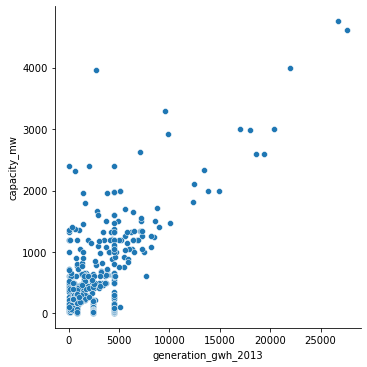

In [24]:
sns.relplot(x= 'generation_gwh_2013',y='capacity_mw',data=data)

Here Generation 2013 column shows some short of linear relationship.

<AxesSubplot:xlabel='primary_fuel', ylabel='capacity_mw'>

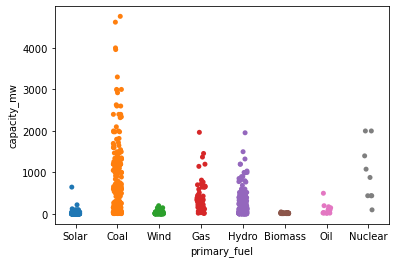

In [25]:
sns.stripplot(x='primary_fuel',y='capacity_mw',data=data)

We can see from above chart, That coal is widely used as a primary fuel.
Also using coal as a primary fuel will give more capcity in (mw). 

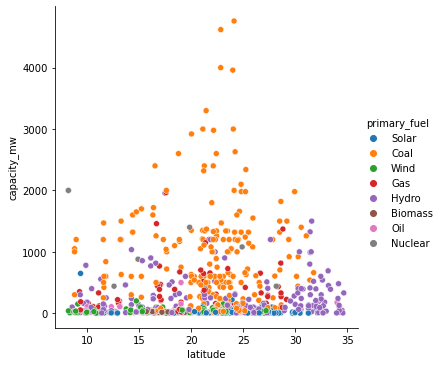

In [26]:
sns.relplot(x='latitude',y='capacity_mw',data=data,hue='primary_fuel')

In this garph we can see that Coal as a fuel produce more entery as compare to HYDRO and Solor.

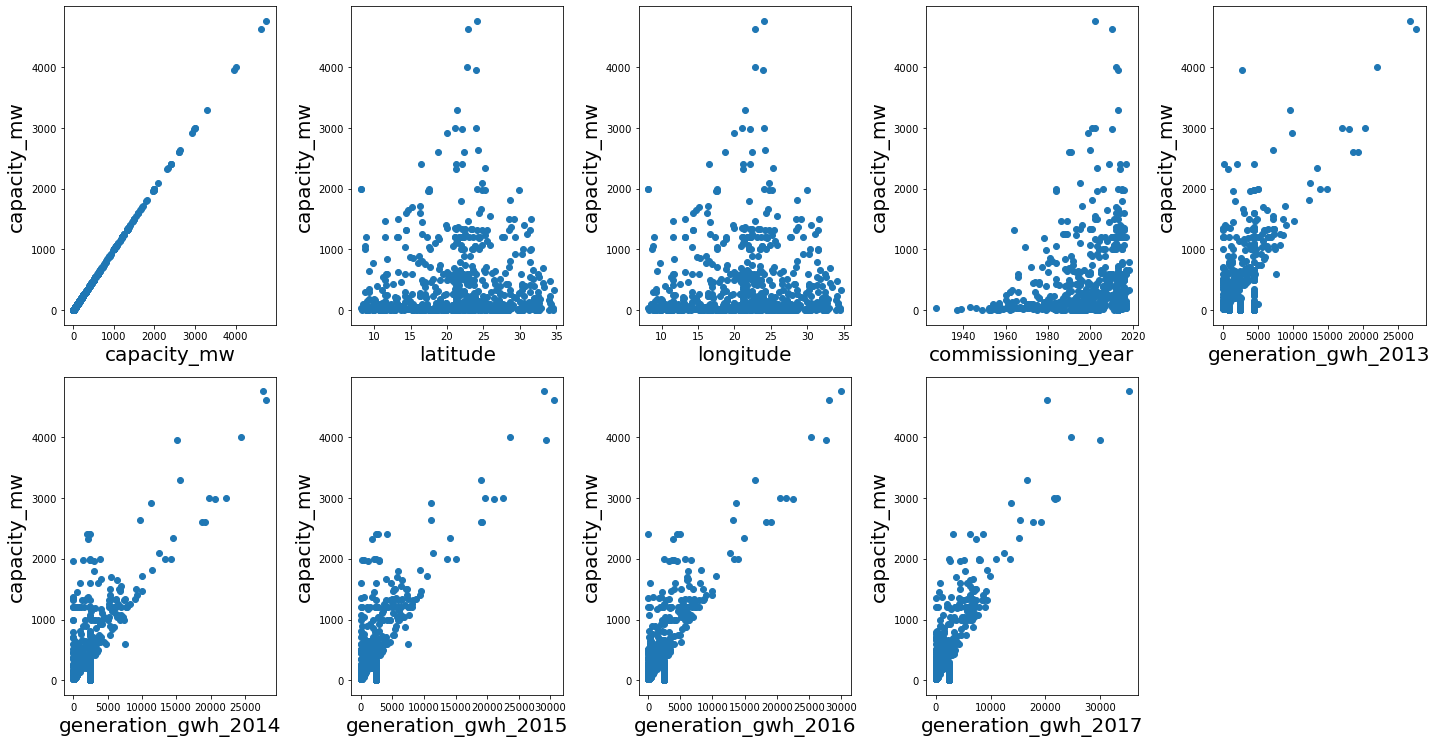

In [27]:
plt.figure(figsize=(20,15), facecolor='white')
count = 1
for column in cols:
    if count<=10:
        ax = plt.subplot(3,5,count)
        plt.scatter(x=data[column],y=data['capacity_mw'])
        plt.xlabel(column,fontsize= 20)
        plt.ylabel('capacity_mw',fontsize = 20)
    count +=1
plt.tight_layout()

 From above charts we could see that all the generations_gwh shows little bit of linearity with our target variable.
 Whereas we could also see that commissioning year column does not show any relationship with our target variab

In [28]:
data.columns

Index(['country_long', 'name', 'gppd_idnr', 'capacity_mw', 'latitude',
       'longitude', 'primary_fuel', 'commissioning_year', 'source',
       'geolocation_source', 'generation_gwh_2013', 'generation_gwh_2014',
       'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017'],
      dtype='object')

Text(0.5, 1.0, 'Yearly capacity for each souran')

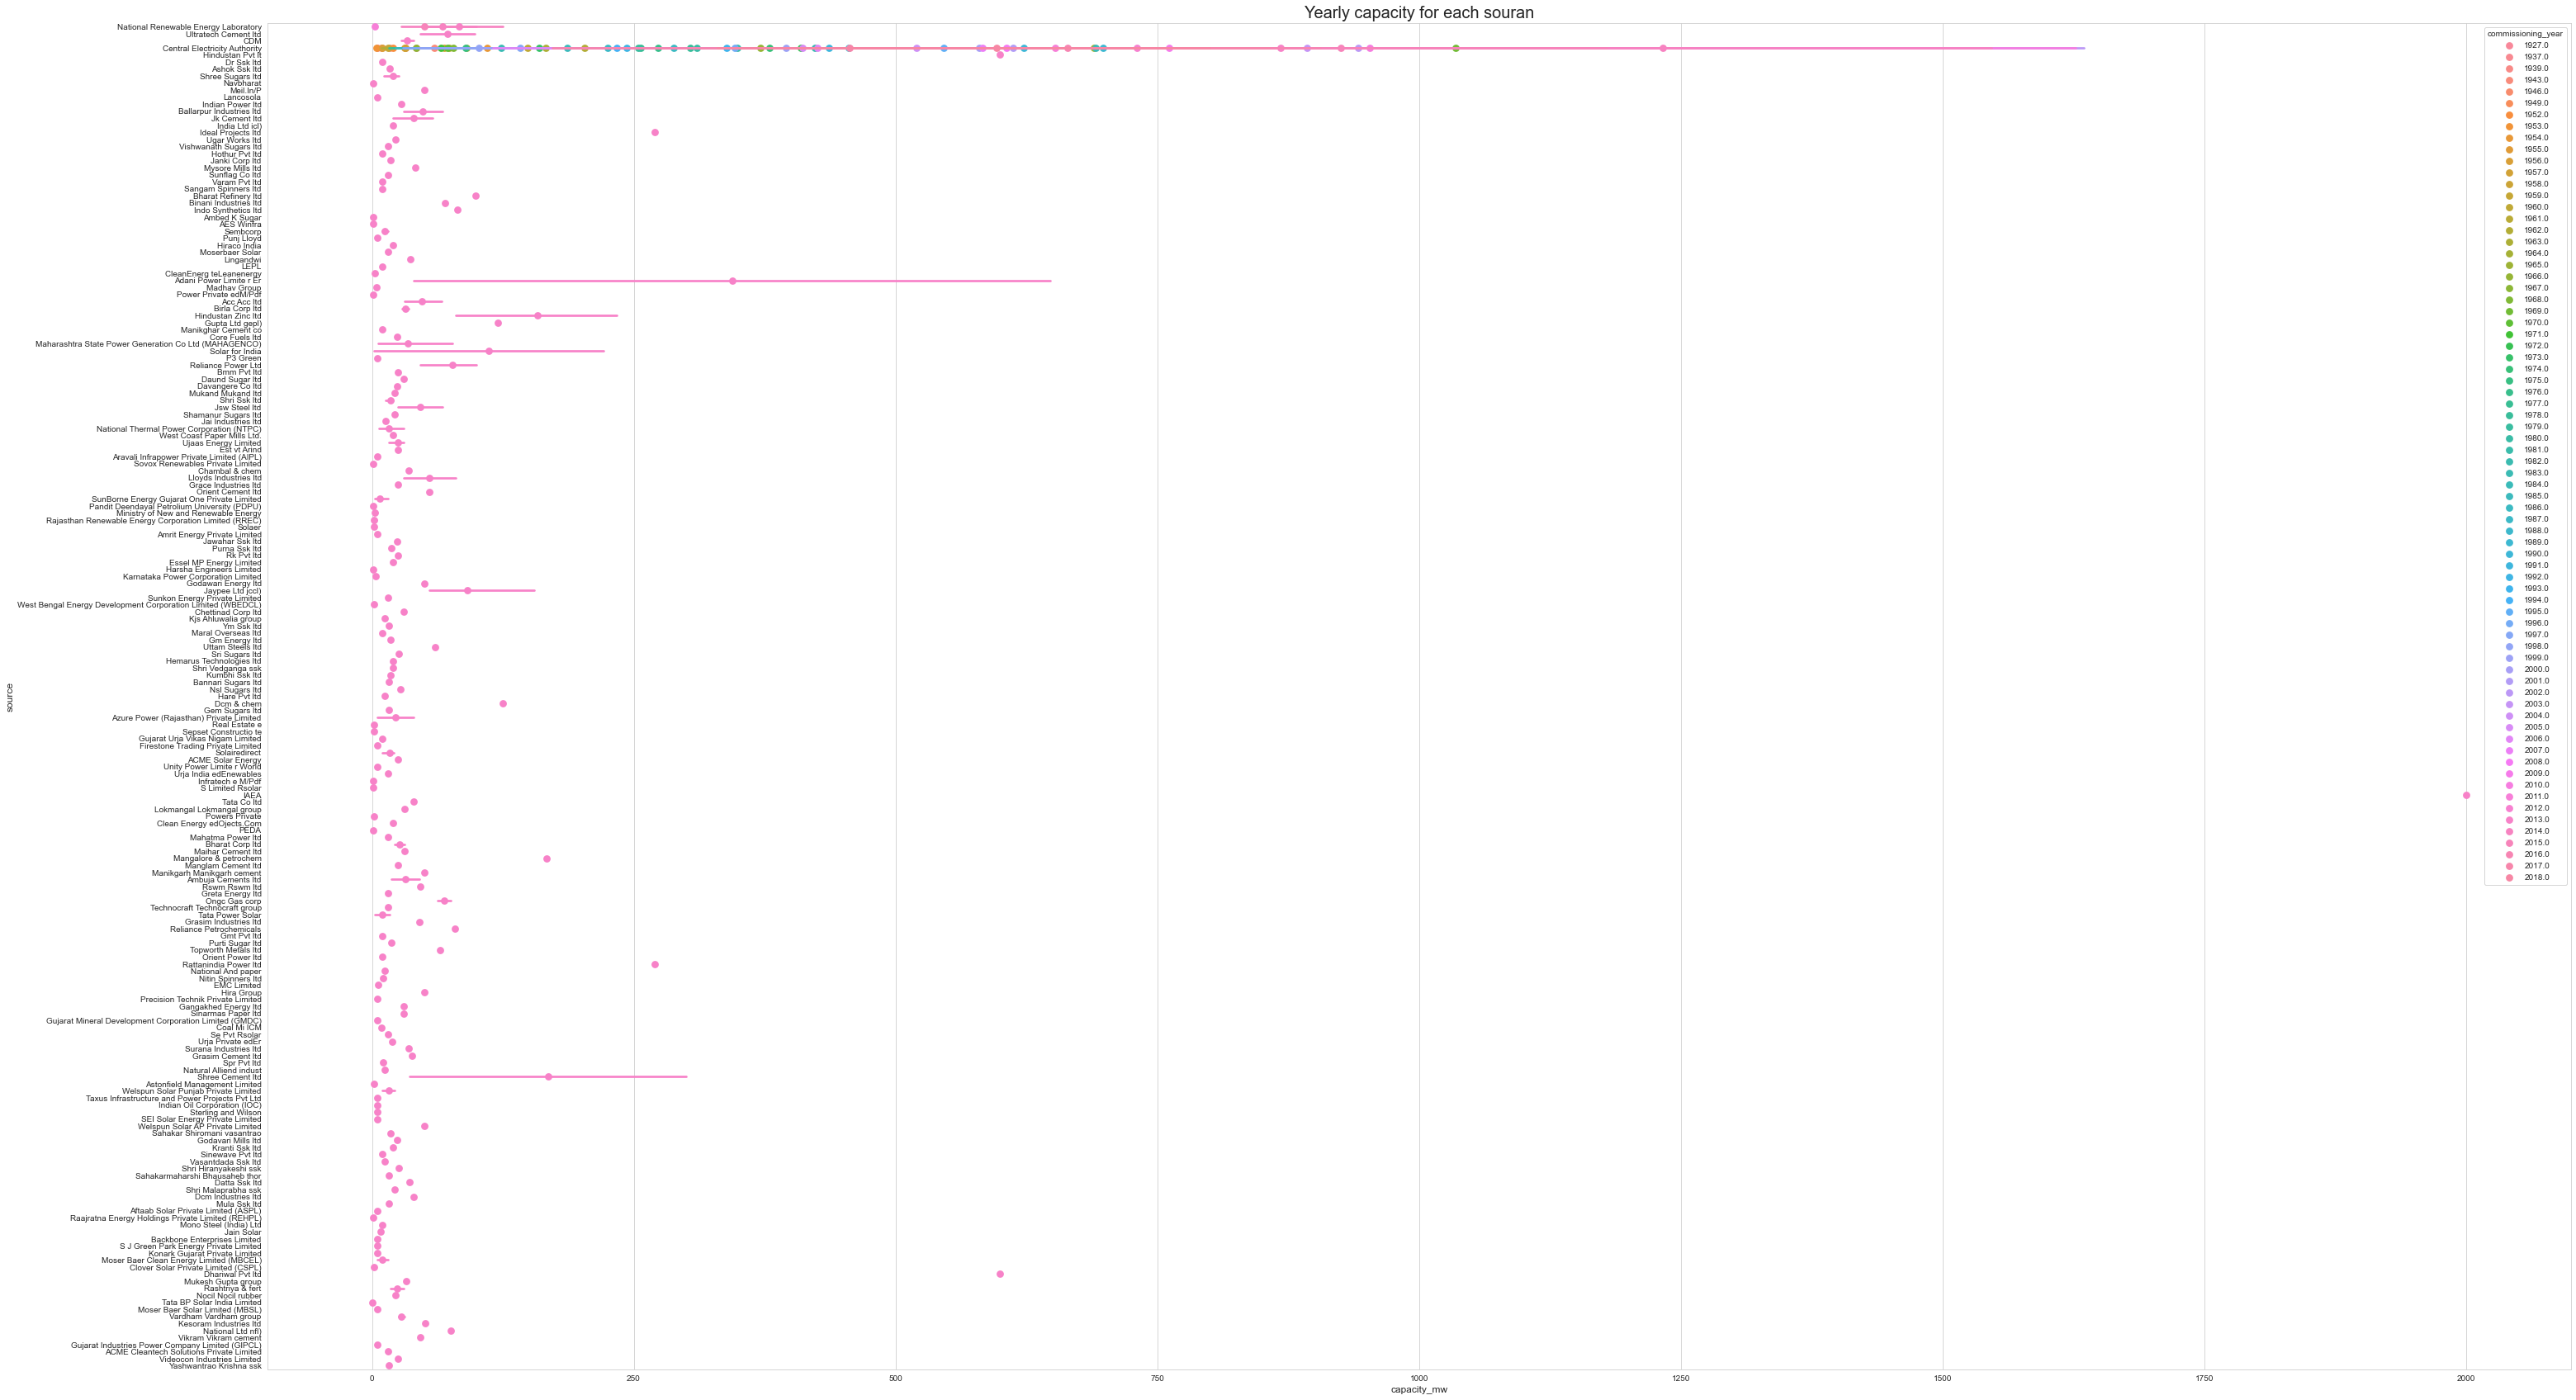

In [29]:
plt.figure(figsize=(50,30))
sns.set_style('whitegrid')
sns.pointplot(x='capacity_mw',y='source',data=data, hue='commissioning_year',join=False)
plt.xlabel('capacity_mw',{'fontsize' : 'large'})
plt.ylabel('source',{'fontsize':'large'})
plt.title("Yearly capacity for each souran",{'fontsize':20})

WE can see centerl Electrical authority has more numbers of plants in india, as CDM

In [30]:
data.head()

,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,India,ACME Solar Tower,WRI1020239,2.5,28.1839,28.1839,Solar,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,2427.983995,2420.393316,2414.072373,2453.936292,2531.754458
1,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,24.7663,Coal,2013.0,Ultratech Cement ltd,WRI,4493.453506,2420.393316,2414.072373,2453.936292,2531.754458
2,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,21.9038,Wind,2013.0,CDM,WRI,2427.983995,2420.393316,2414.072373,2453.936292,2531.754458
3,India,AGARTALA GT,IND0000001,135.0,23.8712,23.8712,Gas,2004.0,Central Electricity Authority,WRI,631.777928,617.789264,843.747000,886.004428,663.774500
4,India,AKALTARA TPP,IND0000002,1800.0,21.9603,21.9603,Coal,2015.0,Central Electricity Authority,WRI,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736


#### (iii) Multivariate Analysis

Before Analysis data we need to convert our catagorical columns in to Numeric. 

In [31]:
data.columns

Index(['country_long', 'name', 'gppd_idnr', 'capacity_mw', 'latitude',
       'longitude', 'primary_fuel', 'commissioning_year', 'source',
       'geolocation_source', 'generation_gwh_2013', 'generation_gwh_2014',
       'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017'],
      dtype='object')

In [32]:
cols = ['country_long','name','gppd_idnr','primary_fuel','source','geolocation_source']

In [33]:
from sklearn.preprocessing import LabelEncoder
L_Enc = LabelEncoder()
data[cols] = data[cols].apply(L_Enc.fit_transform) ### Applying label encoder on all the catagorical columns

In [34]:
data.head()

,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,0,0,658,2.5,28.1839,28.1839,6,2011.0,109,1,2427.983995,2420.393316,2414.072373,2453.936292,2531.754458
1,0,1,520,98.0,24.7663,24.7663,1,2013.0,174,2,4493.453506,2420.393316,2414.072373,2453.936292,2531.754458
2,0,2,854,39.2,21.9038,21.9038,7,2013.0,21,2,2427.983995,2420.393316,2414.072373,2453.936292,2531.754458
3,0,3,0,135.0,23.8712,23.8712,2,2004.0,22,2,631.777928,617.789264,843.747000,886.004428,663.774500
4,0,4,1,1800.0,21.9603,21.9603,1,2015.0,22,2,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736


Now our catagorical columns are converted into numarical columns.

<AxesSubplot:>

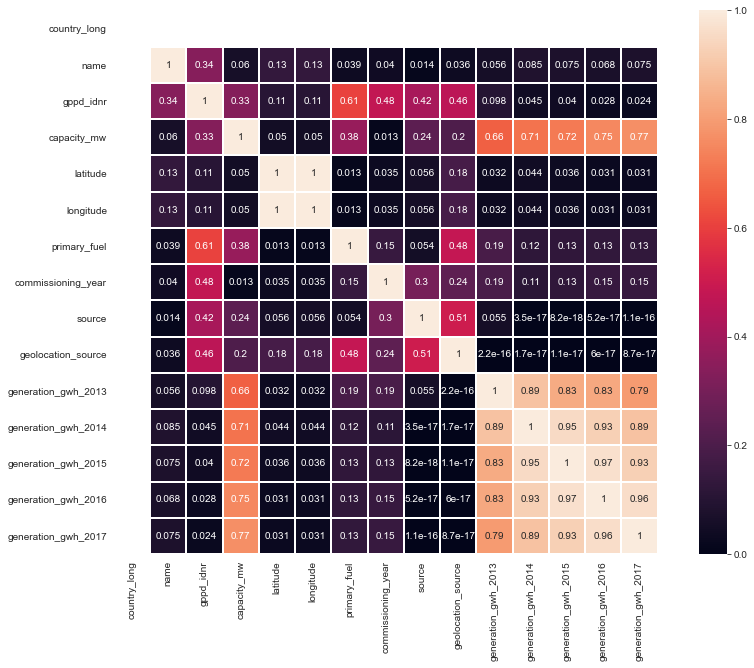

In [35]:
#### Let's check correlationship between target variable and features variable.
data_corr = data.corr().abs()
plt.figure(figsize=(15,10))
sns.heatmap(data=data_corr,linewidths=1,annot=True, square=True,)

###### For target variable Capacity:
We can see generation_gwh_2013, generation_gwh_2014, generation_gwh_2015, generation_gwh_2016, generation_gwh_2017 are 66%, 71%, 72%, 75%, & 77% correlated with our target variable.
Primary fuel is 38% correlated with target variable.
source and grid ID are 24% and 33% respectivily correlated with target variable.
###### for target variable Primary fuel:
grid id is 61% correlated with Primary fuel.
capacity is 38% correlated with primary fuel.
Geolocation source is 48% correlated with Target variable.
All the Generation_gwh are approx 13% correlated with primary fuel.

In [36]:
data.columns

Index(['country_long', 'name', 'gppd_idnr', 'capacity_mw', 'latitude',
       'longitude', 'primary_fuel', 'commissioning_year', 'source',
       'geolocation_source', 'generation_gwh_2013', 'generation_gwh_2014',
       'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017'],
      dtype='object')

In [37]:
### Droping columns which does not required for model building.
data_1 = data.drop(['country_long','name','commissioning_year','source'],axis=1)

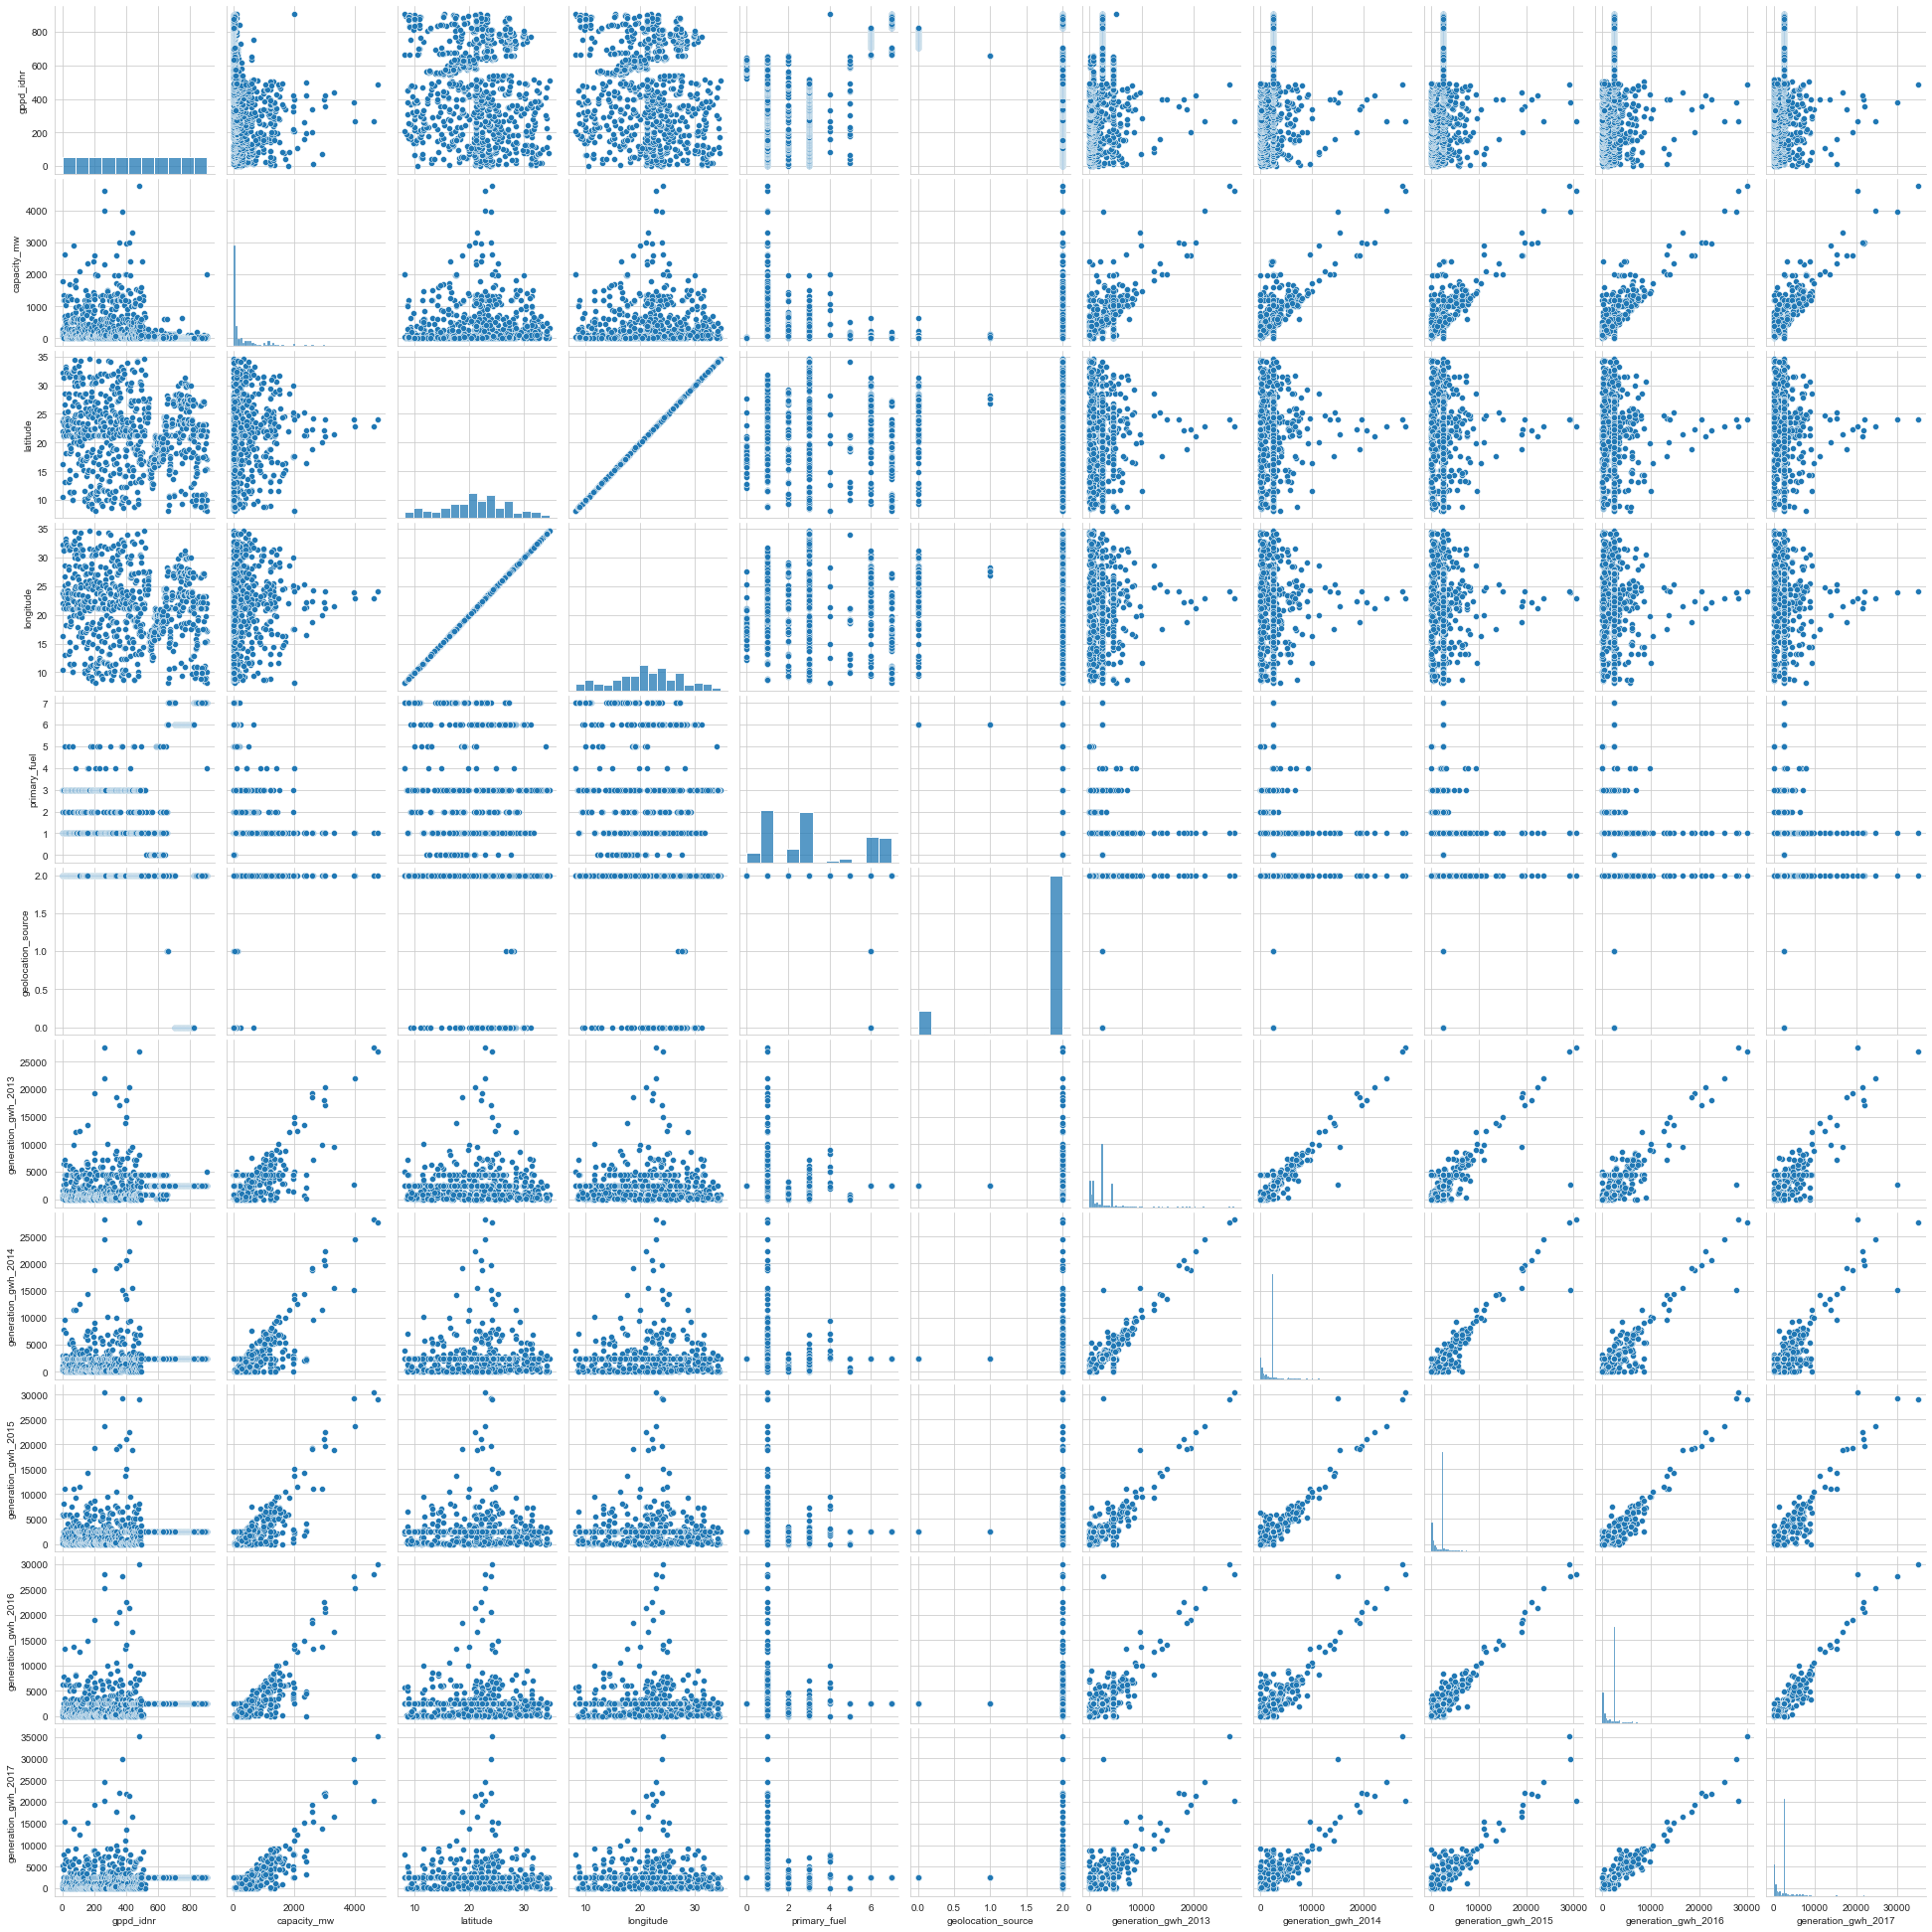

In [38]:
### Let's plot linear regression between all the columns.
sns.pairplot(data_1)

We can see Generation_gwh shows linear relationship with capacity variable.


### Pre_processsing 

In [39]:
### Removing outliers using z score
from scipy.stats import zscore
z = np.abs(zscore(data_1[['generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','capacity_mw']]))
filter_entry = (z<3).all(axis = 1)
df = data_1[filter_entry]

In [40]:
print(df.shape,data_1.shape)

(887, 11) (908, 11)


In [41]:
### Checking data loss after applying Z_Score.
data_loss = ((908 - 887)/908)*100
data_loss

2.3127753303964758

In [42]:
df.skew()

gppd_idnr             -0.023744
capacity_mw            2.038633
latitude              -0.135992
longitude             -0.135992
primary_fuel           0.434233
geolocation_source    -2.122134
generation_gwh_2013    0.999200
generation_gwh_2014    1.524386
generation_gwh_2015    1.394366
generation_gwh_2016    1.424284
generation_gwh_2017    1.293417
dtype: float64

After applying Zscore 2.3% data is loss. Which is acceptable.
###### BY applying zscore most of the skewness is removed from our dataset but still some skewness left ingeneration_gwh columns.    

In [43]:
df['generation_gwh_2013'] = np.sqrt(df['generation_gwh_2013'])
df['generation_gwh_2014'] = np.sqrt(df['generation_gwh_2014'])
df['generation_gwh_2015'] = np.sqrt(df['generation_gwh_2015'])
df['generation_gwh_2016'] = np.sqrt(df['generation_gwh_2016'])
df['generation_gwh_2017'] = np.sqrt(df['generation_gwh_2017'])
df['capacity_mw'] = np.sqrt(df['capacity_mw'])

In [44]:
df.skew()

gppd_idnr             -0.023744
capacity_mw            1.198959
latitude              -0.135992
longitude             -0.135992
primary_fuel           0.434233
geolocation_source    -2.122134
generation_gwh_2013   -0.113201
generation_gwh_2014   -0.441095
generation_gwh_2015   -0.410178
generation_gwh_2016   -0.365871
generation_gwh_2017   -0.389060
dtype: float64

##### As we cann see skewness is removed from our dataset
Capacity is our target variable and rest all the columns are catagorical columns

In [45]:
### spliting our data set for target variable capacity.
X = df.drop ('capacity_mw',axis=1)
y = df['capacity_mw']

### Scaling (Standardization)

In [46]:
#### Now lets scale our data.
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x_scaled = scale.fit_transform(X)
print('Our X data is now scaled now stored in x_scaled')

Our X data is now scaled now stored in x_scaled


### Train - Test Split

In [47]:
 # Now converting data into Train test split.
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.25,random_state=41)

In [48]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(665, 10) (665,) (222, 10) (222,)


### Finding best model


In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import r2_score

In [50]:
### Linear Regression
lr = LinearRegression()
lr.fit(x_train,y_train)
y_lr_pred = lr.predict(x_test)

In [51]:
print('MAE:', metrics.mean_absolute_error(y_test, y_lr_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_lr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_lr_pred)))
print('R2_score', r2_score(y_test,y_lr_pred))

MAE: 5.76231946078906
MSE: 56.05015092117672
RMSE: 7.486664873037708
R2_score 0.4973344367400946


In [52]:
dtr = DecisionTreeRegressor() ### Instantiating DecisionTree Regressor 
dtr.fit(x_train,y_train) ### Training our model with x_train and y_train
y_dtr_pred = dtr.predict(x_test) ### Predicting x_test using DecisionTree model.

In [53]:
print('MAE:', metrics.mean_absolute_error(y_test, y_dtr_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_dtr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_dtr_pred)))
print('R2_score', r2_score(y_test,y_dtr_pred))

MAE: 3.596369225451273
MSE: 30.778924074117295
RMSE: 5.547875636143739
R2_score 0.7239703202939168


In [54]:
knn = KNeighborsRegressor() ### Instantiating KNeighbors Regressor
knn.fit(x_train,y_train) ### Training our model with x_train and y_train
y_knn_pred = knn.predict(x_test) ### Predicting x_test using Kneighbors model.

In [55]:
print('MAE:', metrics.mean_absolute_error(y_test, y_knn_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_knn_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_knn_pred)))
print('R2_score', r2_score(y_test,y_knn_pred))

MAE: 3.1703219228017443
MSE: 23.954013846925967
RMSE: 4.894283793051438
R2_score 0.7851770661664468


In [56]:
from sklearn.svm import SVR
svr = SVR()             ### Instantiating SVR
svr.fit(x_train,y_train) ### Training our model with x_train and y_train
y_svr_pred = svr.predict(x_test) ### Predicting x_test using SVM model.

In [57]:
print('MAE:', metrics.mean_absolute_error(y_test, y_svr_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_svr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_svr_pred)))
print('R2_score', r2_score(y_test,y_svr_pred))

MAE: 4.416517800076831
MSE: 40.411800288120496
RMSE: 6.35702762996359
R2_score 0.6375813442011615


In [58]:
rfr = RandomForestRegressor() ### Instantiating RandomForest Regressor
rfr.fit(x_train,y_train)     ### Training our model with x_train and y_train
y_rfr_pred = rfr.predict(x_test) ### Predicting x_test using Random Forest  model.

In [59]:
print('MAE:', metrics.mean_absolute_error(y_test, y_rfr_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_rfr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_rfr_pred)))
print('R2_score', r2_score(y_test,y_rfr_pred))

MAE: 2.7799273566509375
MSE: 16.673122257067913
RMSE: 4.083273473215811
R2_score 0.8504731164339503


Text(0, 0.5, 'Predicted Y')

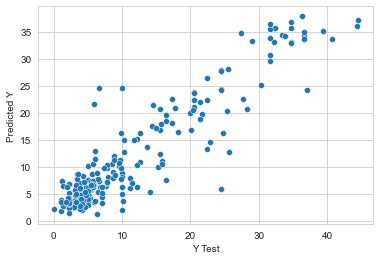

In [60]:
### Let's plot and check differnce between Y_test and y_rfr_pred 
sns.scatterplot(x= y_test,y = y_rfr_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

###### As comparing r2_score for each model Random forest is giving best accuracy as 84%.
###### Also we can see the RMSE is lower as compare to other models so the RandomForest Regressor is the best model in this case.

### performing Hyper Parameter tuning.

In [61]:
from sklearn.model_selection import RandomizedSearchCV ### Importing RandomizedSearchCV for parameter tuning.

In [62]:
params = {'n_estimators': np.arange(100,150,10),
               'max_features': ['auto','sqrt','log'],
               'max_depth': np.arange(2,10,2),
               'min_samples_split': np.arange(2,10,2),
               'min_samples_leaf': np.arange(5,20,5),
         'random_state':np.arange(40,70,3)}

In [63]:
randomized_search = RandomizedSearchCV(estimator=rfr,param_distributions=params,cv=5,n_jobs= -1)
randomized_search.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': array([2, 4, 6, 8]),
                                        'max_features': ['auto', 'sqrt', 'log'],
                                        'min_samples_leaf': array([ 5, 10, 15]),
                                        'min_samples_split': array([2, 4, 6, 8]),
                                        'n_estimators': array([100, 110, 120, 130, 140]),
                                        'random_state': array([40, 43, 46, 49, 52, 55, 58, 61, 64, 67])})

In [64]:
randomized_search.best_params_

{'random_state': 52,
 'n_estimators': 140,
 'min_samples_split': 6,
 'min_samples_leaf': 15,
 'max_features': 'auto',
 'max_depth': 6}

##### Above are the best parameters to configure our Random forest model.

In [65]:
rfr_final = RandomForestRegressor(random_state=52,n_estimators = 130,min_impurity_split=6,min_samples_leaf=10,max_features='auto',max_depth=6)

In [66]:
rfr_final.fit(x_train,y_train)

RandomForestRegressor(max_depth=6, min_impurity_split=6, min_samples_leaf=10,
                      n_estimators=130, random_state=52)

In [67]:
y_final_pred = rfr_final.predict(x_test)

In [68]:
print('MAE:', metrics.mean_absolute_error(y_test, y_final_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_final_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_final_pred)))
print('R2_score', r2_score(y_test,y_final_pred))

MAE: 2.88809692765118
MSE: 16.522192242583145
RMSE: 4.064749960647413
R2_score 0.8518266778338206


As we can see the R2_score is 85% and MAE, MSE, & RMSE also less as compare to Default Random forest model.

### Saving our model

In [69]:
import pickle
Capacity = 'Capacity.pickle'
pickle.dump(rfr,open(Capacity,'wb'))

## Now taking target variable  Primary Fuel 

In [63]:
x = df.drop(['primary_fuel'],axis=1)
y = df['primary_fuel']

### Dealing with class imbalancing problem.

In [64]:
# Now let's deal with Class imbalance problem.
from imblearn.over_sampling import SMOTE
sm = SMOTE()
x_new,y_new = sm.fit_resample(x,y)

In [65]:
y_new.value_counts()

0    250
1    250
2    250
3    250
4    250
5    250
6    250
7    250
Name: primary_fuel, dtype: int64

#### All the classes in our target variable are balanced now.

### Scaling (Standardization)

In [66]:
#### Now lets scale our data.
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x_scaled = scale.fit_transform(x_new)


### Train - Test Split

In [67]:
 # Now converting data into Train test split.
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y_new,test_size=0.25,random_state=52)

In [68]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(1500, 10) (1500,) (500, 10) (500,)


### Finding best model

In [69]:
## Importing models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, plot_roc_curve

In [70]:
#### Logistic Regression
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_lr_pred = lr.predict(x_test)

In [71]:
confusion_matrix(y_test,y_lr_pred)

array([[55,  1,  0,  0,  0,  0,  0,  0],
       [ 6, 27,  6,  5, 24,  2,  0,  0],
       [ 3,  7, 32, 18,  0,  3,  0,  1],
       [ 2,  1, 13, 36,  2,  8,  0,  0],
       [ 0, 11,  0,  0, 54,  0,  0,  0],
       [ 0,  0,  2,  4,  0, 61,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 52,  2],
       [ 4,  0,  0,  0,  0,  0,  0, 58]], dtype=int64)

In [72]:
accuracy_lr = classification_report(y_test,y_lr_pred)
print(accuracy_lr)
cv_lr = cross_val_score(lr,x_scaled,y_new,cv=5).mean()
print('Cross validation score :',cv_lr)

              precision    recall  f1-score   support

           0       0.79      0.98      0.87        56
           1       0.57      0.39      0.46        70
           2       0.60      0.50      0.55        64
           3       0.57      0.58      0.58        62
           4       0.68      0.83      0.74        65
           5       0.82      0.91      0.87        67
           6       1.00      0.96      0.98        54
           7       0.95      0.94      0.94        62

    accuracy                           0.75       500
   macro avg       0.75      0.76      0.75       500
weighted avg       0.74      0.75      0.74       500

Cross validation score : 0.7615000000000001


In [73]:
#### Decision Tree Classifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_dt_pred = dt.predict(x_test)

In [74]:
confusion_matrix(y_test,y_dt_pred)

array([[55,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 46,  8,  1, 12,  3,  0,  0],
       [ 0, 10, 48,  5,  1,  0,  0,  0],
       [ 0,  4, 10, 47,  0,  1,  0,  0],
       [ 0,  8,  1,  1, 55,  0,  0,  0],
       [ 0,  0,  1,  3,  0, 63,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 54,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 62]], dtype=int64)

In [75]:
accuracy_dt = classification_report(y_test,y_dt_pred)
print(accuracy_dt)
cv_dt = cross_val_score(dt,x_scaled,y_new,cv=5).mean()
print('Cross validation score :',cv_dt)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        56
           1       0.68      0.66      0.67        70
           2       0.70      0.75      0.72        64
           3       0.82      0.76      0.79        62
           4       0.81      0.85      0.83        65
           5       0.94      0.94      0.94        67
           6       1.00      1.00      1.00        54
           7       1.00      1.00      1.00        62

    accuracy                           0.86       500
   macro avg       0.87      0.87      0.87       500
weighted avg       0.86      0.86      0.86       500

Cross validation score : 0.882


In [76]:
### SVC
svc = SVC()
svc.fit(x_train,y_train)
y_svc_pred = svc.predict(x_test)

In [77]:
confusion_matrix(y_test,y_svc_pred)

array([[55,  0,  0,  0,  0,  0,  0,  1],
       [ 0, 38,  6,  1, 22,  3,  0,  0],
       [ 0,  6, 45,  9,  0,  4,  0,  0],
       [ 0,  1, 13, 45,  1,  2,  0,  0],
       [ 0,  0,  0,  0, 65,  0,  0,  0],
       [ 0,  0,  0,  1,  0, 66,  0,  0],
       [ 1,  0,  0,  0,  0,  0, 52,  1],
       [ 8,  0,  0,  0,  0,  0,  0, 54]], dtype=int64)

In [78]:
accuracy_svc = classification_report(y_test,y_svc_pred)
print(accuracy_svc)
cv_svc = cross_val_score(svc,x_scaled,y_new,cv=5).mean()
print('Cross validation score :',cv_svc)

              precision    recall  f1-score   support

           0       0.86      0.98      0.92        56
           1       0.84      0.54      0.66        70
           2       0.70      0.70      0.70        64
           3       0.80      0.73      0.76        62
           4       0.74      1.00      0.85        65
           5       0.88      0.99      0.93        67
           6       1.00      0.96      0.98        54
           7       0.96      0.87      0.92        62

    accuracy                           0.84       500
   macro avg       0.85      0.85      0.84       500
weighted avg       0.85      0.84      0.83       500

Cross validation score : 0.8585


In [79]:
### Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_rf_pred = rf.predict(x_test)

In [80]:
confusion_matrix(y_test,y_rf_pred)

array([[55,  1,  0,  0,  0,  0,  0,  0],
       [ 0, 49,  5,  1, 12,  3,  0,  0],
       [ 0,  3, 56,  4,  0,  1,  0,  0],
       [ 0,  1, 10, 50,  1,  0,  0,  0],
       [ 0,  5,  0,  0, 60,  0,  0,  0],
       [ 0,  0,  0,  1,  0, 66,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 54,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 62]], dtype=int64)

In [81]:
accuracy_rf = classification_report(y_test,y_rf_pred)
print(accuracy_rf)
cv_rf = cross_val_score(rf,x_scaled,y_new,cv=5).mean()
print('Cross validation score :',cv_rf)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        56
           1       0.83      0.70      0.76        70
           2       0.79      0.88      0.83        64
           3       0.89      0.81      0.85        62
           4       0.82      0.92      0.87        65
           5       0.94      0.99      0.96        67
           6       1.00      1.00      1.00        54
           7       1.00      1.00      1.00        62

    accuracy                           0.90       500
   macro avg       0.91      0.91      0.91       500
weighted avg       0.91      0.90      0.90       500

Cross validation score : 0.899


In [82]:
### K-Neighbors Classifier
kn = KNeighborsClassifier()
kn.fit(x_train,y_train)
y_knn_pred = kn.predict(x_test)

In [83]:
confusion_matrix(y_test,y_knn_pred)

array([[54,  0,  0,  0,  0,  0,  0,  2],
       [ 0, 36,  5,  1, 26,  2,  0,  0],
       [ 0,  5, 45,  7,  4,  3,  0,  0],
       [ 0,  2, 11, 47,  0,  2,  0,  0],
       [ 0,  1,  0,  0, 64,  0,  0,  0],
       [ 0,  0,  2,  0,  0, 65,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 53,  1],
       [ 2,  0,  0,  0,  0,  0,  4, 56]], dtype=int64)

In [84]:
accuracy_kn = classification_report(y_test,y_knn_pred)
print(accuracy_kn)
cv_kn = cross_val_score(kn,x_scaled,y_new,cv=5).mean()
print('Cross validation score :',cv_kn)

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        56
           1       0.82      0.51      0.63        70
           2       0.71      0.70      0.71        64
           3       0.85      0.76      0.80        62
           4       0.68      0.98      0.81        65
           5       0.90      0.97      0.94        67
           6       0.93      0.98      0.95        54
           7       0.95      0.90      0.93        62

    accuracy                           0.84       500
   macro avg       0.85      0.85      0.84       500
weighted avg       0.85      0.84      0.83       500

Cross validation score : 0.868


#### Out of 5 model Random Forest Classifier is our best model, Becuase its given as acc 91% and Cross validatiion score 91.7%. therefore its our best model.

### Hyper parameter tuning using GridSearchCV

In [85]:
from sklearn.model_selection import GridSearchCV

In [86]:
params = {'n_estimators':np.arange(100,200,10),
          'criterion':['gini','entropy'],
          'max_depth':[11],
          'min_samples_split':np.arange(2,11,2),
          'max_features':['auto','sqrt','log2'],
         'random_state':np.arange(45,60,5)}

In [94]:
gridsearch = GridSearchCV(estimator=rf,param_grid=params,cv=5,n_jobs=-1)
gridsearch.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [11],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': array([ 2,  4,  6,  8, 10]),
                         'n_estimators': array([100, 110, 120, 130, 140, 150, 160, 170, 180, 190]),
                         'random_state': array([45, 50, 55])})

In [95]:
gridsearch.best_params_

{'criterion': 'entropy',
 'max_depth': 11,
 'max_features': 'auto',
 'min_samples_split': 4,
 'n_estimators': 120,
 'random_state': 55}

In [99]:
rfc_final = RandomForestClassifier(criterion='entropy',max_depth=11,max_features='auto',min_samples_split=4,n_estimators= 120,random_state=55)

In [100]:
rfc_final.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=11, min_samples_split=4,
                       n_estimators=120, random_state=55)

In [101]:
y_final = rfc_final.predict(x_test)

In [102]:
confusion_matrix(y_test,y_final)

array([[56,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 48,  7,  2, 11,  2,  0,  0],
       [ 0,  1, 58,  2,  0,  3,  0,  0],
       [ 0,  2, 11, 48,  0,  1,  0,  0],
       [ 0,  1,  0,  0, 64,  0,  0,  0],
       [ 0,  0,  0,  1,  0, 66,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 54,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 62]], dtype=int64)

In [103]:
accuracy_rf = classification_report(y_test,y_final)
print(accuracy_rf)
cv_rf = cross_val_score(rf,x_scaled,y_new,cv=5).mean()
print('Cross validation score :',cv_rf)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        56
           1       0.92      0.69      0.79        70
           2       0.76      0.91      0.83        64
           3       0.91      0.77      0.83        62
           4       0.85      0.98      0.91        65
           5       0.92      0.99      0.95        67
           6       1.00      1.00      1.00        54
           7       1.00      1.00      1.00        62

    accuracy                           0.91       500
   macro avg       0.92      0.92      0.91       500
weighted avg       0.92      0.91      0.91       500

Cross validation score : 0.9165000000000001


###### As we can see our previous model with default parameters is giving better performance then the model instantiate with best parameters. Hence we are saving default model as final model.


In [ ]:
import pickle
Primary_fuel = 'Primary fuel.pickle'
pickle.dump(rfc_final,open(Primary_fuel,'wb'))

In [ ]:
__________________________________________________Model Completed__________________________________________________________